#Thinkful Data Science Course
##Unit 4: Predicting the Future; Lesson 1: Making Predictions
##Fitting and Overfitting

Now it's your turn. Use the following code to generate a toy regression dataset, and split the data into 70% training and 30% testing data. Using mean squared error as a metric, compare the performance of different polynomial curves in the training set and in the testing set. Submit your project as overfitting.py

In [1]:
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd

# Set seed for reproducible results
np.random.seed(414)

# Gen toy data
X = np.linspace(0, 15, 1000)
y = 3 * np.sin(X) + np.random.normal(1 + X, .2, 1000)

train_X, train_y = X[:700], y[:700]
test_X, test_y = X[700:], y[700:]

train_df = pd.DataFrame({'X': train_X, 'y': train_y})
test_df = pd.DataFrame({'X': test_X, 'y': test_y})

In [2]:
# Linear Fit
poly_1 = smf.ols(formula='y ~ 1 + X', data=train_df).fit()

In [3]:
pred = poly_1.predict(test_df)

In [4]:
pred

array([ 11.34605278,  11.35941012,  11.37276745,  11.38612479,
        11.39948213,  11.41283947,  11.4261968 ,  11.43955414,
        11.45291148,  11.46626882,  11.47962616,  11.49298349,
        11.50634083,  11.51969817,  11.53305551,  11.54641284,
        11.55977018,  11.57312752,  11.58648486,  11.59984219,
        11.61319953,  11.62655687,  11.63991421,  11.65327154,
        11.66662888,  11.67998622,  11.69334356,  11.7067009 ,
        11.72005823,  11.73341557,  11.74677291,  11.76013025,
        11.77348758,  11.78684492,  11.80020226,  11.8135596 ,
        11.82691693,  11.84027427,  11.85363161,  11.86698895,
        11.88034629,  11.89370362,  11.90706096,  11.9204183 ,
        11.93377564,  11.94713297,  11.96049031,  11.97384765,
        11.98720499,  12.00056232,  12.01391966,  12.027277  ,
        12.04063434,  12.05399168,  12.06734901,  12.08070635,
        12.09406369,  12.10742103,  12.12077836,  12.1341357 ,
        12.14749304,  12.16085038,  12.17420771,  12.18

In [5]:
actual = np.array(test_df['y'].tolist())

In [6]:
actual

array([  9.11355686,   8.79806467,   8.9313485 ,   9.04773388,
         8.65909466,   9.11519643,   8.96686064,   8.94742599,
         8.76116573,   8.57031857,   8.54221085,   8.84084919,
         8.68558964,   9.11676948,   9.01326327,   8.64533076,
         8.95665168,   8.91117216,   8.49608993,   8.86791681,
         8.9365543 ,   8.82984015,   9.05243769,   8.63067848,
         8.8283513 ,   8.99550006,   8.73583869,   9.04191238,
         8.61312444,   8.49831794,   8.60425784,   9.07859536,
         9.40423353,   8.83186679,   8.90617173,   9.03933547,
         9.14214397,   9.28679145,   9.4477728 ,   9.08270999,
         8.97105014,   9.02831612,   9.01271953,   8.73272281,
         9.477346  ,   9.2343554 ,   9.27133816,   9.19043422,
         9.21479079,   9.24396465,   9.43891631,   9.04300428,
         9.42446634,   9.61860665,   9.55746811,   9.6253561 ,
         9.38501677,   9.42592119,   9.29303562,   9.72044866,
         9.83152674,   9.83701568,   9.540746  ,   9.76

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
mse = mean_squared_error(actual,pred)

In [9]:
print('The Mean Squared Error of Linear Fit is', mse)

The Mean Squared Error of Linear Fit is 6.54754127446


In [10]:
# Quadratic Fit
poly_2 = smf.ols(formula='y ~ 1 + X + I(X**2)', data=train_df).fit()

In [11]:
pred2 = poly_2.predict(test_df)

In [12]:
pred2

array([ 12.50583782,  12.52912199,  12.55243444,  12.57577518,
        12.59914419,  12.62254149,  12.64596707,  12.66942093,
        12.69290307,  12.7164135 ,  12.7399522 ,  12.76351919,
        12.78711446,  12.81073801,  12.83438984,  12.85806995,
        12.88177835,  12.90551502,  12.92927998,  12.95307322,
        12.97689474,  13.00074454,  13.02462263,  13.04852899,
        13.07246364,  13.09642657,  13.12041778,  13.14443727,
        13.16848505,  13.1925611 ,  13.21666544,  13.24079806,
        13.26495896,  13.28914814,  13.3133656 ,  13.33761135,
        13.36188537,  13.38618768,  13.41051827,  13.43487714,
        13.45926429,  13.48367973,  13.50812344,  13.53259544,
        13.55709572,  13.58162428,  13.60618112,  13.63076625,
        13.65537965,  13.68002134,  13.70469131,  13.72938956,
        13.75411609,  13.7788709 ,  13.803654  ,  13.82846537,
        13.85330503,  13.87817297,  13.90306919,  13.92799369,
        13.95294648,  13.97792754,  14.00293689,  14.02

In [13]:
mse2 = mean_squared_error(actual,pred2)

In [14]:
print('The Mean Squared Error of Quadratic Fit is', mse2)

The Mean Squared Error of Quadratic Fit is 7.98738294501


In [15]:
poly_3 = smf.ols(formula = 'y ~ 1 + X + I(X**2) + I(X**3)', data=train_df).fit()

In [16]:
pred3 = poly_3.predict(test_df)

In [17]:
mse3 = mean_squared_error(actual,pred3)

In [18]:
print('The Mean Squared Error of Cubic Fit is', mse3)

The Mean Squared Error of Cubic Fit is 199.654810444


In [22]:
pred.shape

(300,)

In [24]:
train_X.shape

(700,)

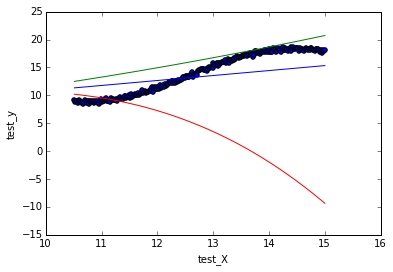

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(test_X, test_y)
plt.xlabel('test_X')
plt.ylabel('test_y')
plt.plot(test_X, pred, 'b-', label='Poly n=1')
plt.plot(test_X, pred2, 'g-', label='Poly n=2')
plt.plot(test_X, pred3, 'r-', label='Poly n=3')
# plt.plot(poly_1, 'b-', label='Poly n=1')
# plt.plot(poly_2, 'g-', label='Poly n=2')
# plt.plot(poly_3, 'r-', label='Poly n=3')
plt.show('overfitting.png')